<a href="https://colab.research.google.com/github/Mario-RJunior/census-analysis/blob/master/census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Census Analysis

## 1) Introduction

In this work we are going to analyse the database called Adult Data Set that can be found [here](https://archive.ics.uci.edu/ml/datasets/Adult). This dataset contains information about American citizens sparsed in 14 atributes and we intend to predict whether income is exceeds $ 50,000 per year. To do so, we'll be using Machine Learning algorithms.

This is the first part of this work where we'll study database in order to understand our data and eventually make some corrections on it.

## 2) Exploratory Data Analysis (EDA) 

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
! git clone https://github.com/Mario-RJunior/census-analysis

Cloning into 'census-analysis'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [3]:
# Create dataframe
df = pd.read_csv('census-analysis/census.csv')
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.dtypes

age                int64
workclass         object
final-weight       int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loos       int64
hour-per-week      int64
native-country    object
income            object
dtype: object

Since the columns-typed object have some space in their data we are going to use Pythom method strip() to correct it. Plus we can see that workclass and occupation columns have data like "?" then let's replace it for "Other".

In [7]:
columns = ('workclass', 'education', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex')
for col in columns:
  df[col] = df[col].map(lambda x: x.strip())

In [8]:
df['workclass'] = df['workclass'].replace('?', 'Other')
df['occupation'] = df['occupation'].replace('?', 'Other')

- Occupation plot

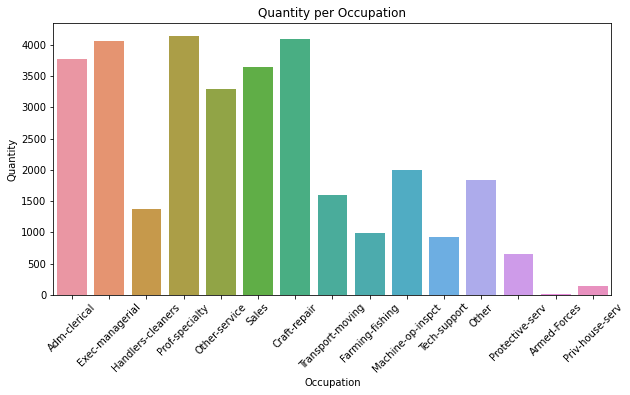

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='occupation', data=df, orient='v')
plt.title('Quantity per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

- Workclass plot

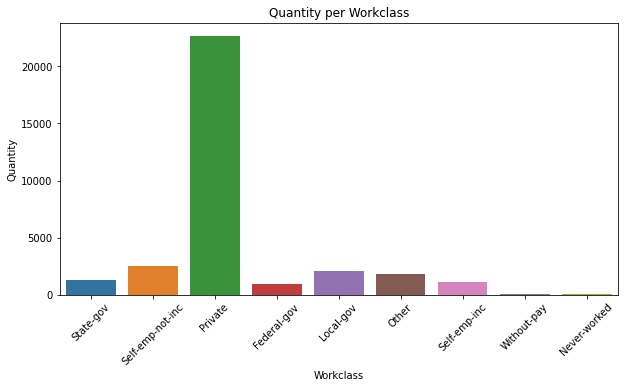

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='workclass', data=df, orient='v')
plt.title('Quantity per Workclass')
plt.xlabel('Workclass')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()